# Stochastic analysis of Snakes and Ladders using Markov Chains

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

# Default board size
size = 100

# Default number of die faces
faces = 6

# Default snake and ladder positions
snl_pos = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44, 47:26, 49:11, 
                        51:67, 56:53, 62:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}


Numerical evaluation

In [5]:
def board(snl, size):
    # Creating a board numbered 1-100    
    board = np.arange(1, size+1)
    
    # Taking the index(key) grid reference for each point with an snake or 
    # ladder and replacing that point with its new position
    for key, value in snl.items():
        board[key-1] = value
    
    return board



def roll(faces):
    return int(rand.random() * faces) + 1 # Computational faster than rand.randint(1,faces)



def game(board, size, faces):

    count = 0
    rolls = 0

    while count != size:
        val = roll(faces)
        # Ensures that win conditions are met and postion doesn't exceed board size 
        if (count + val) <= size: 
            count += val
            count = board[count-1]

        rolls += 1

    return rolls

In [6]:
board = board(snl_pos, size)

# Number of simulations
n = 10**6

# List for duration of each simulation
rolls = np.zeros(n)

# Simulates game n times and adds to list
for i in range(n):
    rolls[i] = game(board, size, faces)

    
# Average for expected duration
avg = sum(rolls)/n

# Variance of duration to end game
v = sum([(i - avg)**2 for i in rolls])/(n)

print ("The expected duration when analysed numerically:", avg)
print ("The variance when analysed numerically:", v)

The expected duration when analysed numerically: 39.241465
The variance when analysed numerically: 639.3494376536004


Analytical evaluation

In [7]:
# Analytical

def game_matrix(size, faces):

    # Generates a transition matrix of a board without snakes and ladders
    # with probability of 1/faces eg. 1/6
    
    M = np.zeros((size+1,size+1))
    for i in range (size+1): 
        M[i,i+1:i+faces+1] = 1/faces
    for i in range (1,faces):
        M[size-i,size-i] = (faces-i)/faces
    M[size,size] = 1

    return M



def snl_matrix(snl, size):

    # Generates a matrix of the positions of snakes and ladders
    # If snake or ladder i --> j, sl[i,j] = 1, mapping the two point. Else sl[i,i] = 1   
    
    sl = np.zeros((size+1, size+1))
    for key, value in snl.items():
        sl[key,value] = 1 
    for i in range(0, size+1):
        if 1 not in sl[i]:
            sl[i,i]=1

    return sl



def start_pos(size):
    # Generates a 1D array (0:size+1) with first element equal to 1, representint the pre-game position
    p=np.zeros(size+1)
    p[0]=1
    
    return p
    


def variance(T):
    
    # Calculates the variance of the number of turns using the equation for Markov chains
    # (2N-I_t)t*t_sq
    # Outputs (variance, expected number of turns)
    
    Q = T[:size,:size]
    I = np.identity(size)
    N = np.linalg.inv(I-Q)
    
    ones = [[1]]*size
    t = np.matmul(N,ones)
    
    variance = np.matmul((2*N-I),t)-t**2 
    
    return (variance[0][0], t[0][0])

In [8]:

M = game_matrix(size, faces)

p = start_pos(size)

sl = snl_matrix(snl_pos, size)

# Transition matrix of board with snakes and ladders
T = np.matmul(M,sl)


print("The duration when analysed analytically: ", variance(T)[1])
print("The variance when analysed analytically: ", variance(T)[0])
print("The variance without snakes and ladders: ", variance(M)[0])
print("The duration without snakes and ladders: ", variance(M)[1])

The duration when analysed analytically:  39.2251223082349
The variance when analysed analytically:  636.2984613448764
The variance without snakes and ladders:  36.507936507936165
The duration without snakes and ladders:  33.33333333333334


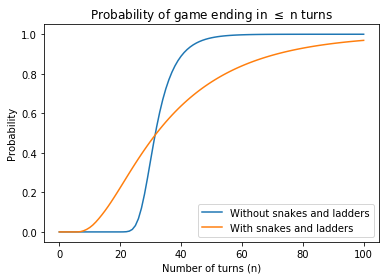

In [9]:
# Plotting the probability of game ending in <= n turns

x = np.arange(size+1)
y1 = [np.matmul(p,np.linalg.matrix_power(M,n))[size] for n in x] # Board without snakes or ladders
y2 = [np.matmul(p,np.linalg.matrix_power(T,n))[size] for n in x] # Board with snakes and ladders

plt.plot(x, y1, label = "Without snakes and ladders")
plt.plot(x, y2, label = "With snakes and ladders")
plt.title("Probability of game ending in $\leq$ n turns")
plt.xlabel("Number of turns (n)")
plt.ylabel("Probability")
plt.legend(loc="lower right")

<function matplotlib.pyplot.show(*args, **kw)>

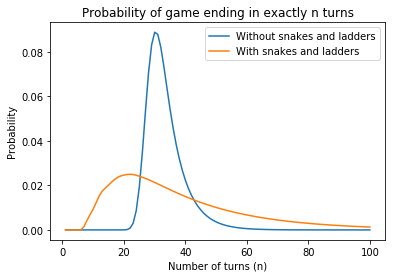

In [10]:
# Plotting the probability of game ending in exactly n turns (p(n)-p(n-1))

y1 = np.diff([np.matmul(p,np.linalg.matrix_power(M,n))[size] for n in x]) # Board without snakes or ladders
y2 = np.diff([np.matmul(p,np.linalg.matrix_power(T,n))[size] for n in x]) # Board with snakes and ladders


plt.plot(x[1:], y1, label = "Without snakes and ladders")
plt.plot(x[1:], y2, label = "With snakes and ladders")
plt.title("Probability of game ending in exactly n turns")
plt.xlabel("Number of turns (n)")
plt.ylabel("Probability")
plt.legend(loc="upper right")
plt.show

In [11]:
# Creating a results array of [num of dice faces, variance, expected number of turns] for die with 2-100 faces

res = np.zeros((99,3))

sl = snl_matrix(snl_pos, size)

for i in range (99):

    M = game_matrix(size, i+2)
    T = np.matmul(M,sl)
    var = variance(T)
    
    res[i] = [i+2,var[0],var[1]]

print("Variance is minimised when faces =", res[np.argmin(res[:,1]),0], ", with variance =", res[np.argmin(res[:,1]),1])
print("Duration is minimised when faces =", res[np.argmin(res[:,2]),0], ", with duration =", res[np.argmin(res[:,2]),2])

Variance is minimised when faces = 11.0 , with variance = 248.35592469083008
Duration is minimised when faces = 15.0 , with duration = 25.805895077074965


<function matplotlib.pyplot.show(*args, **kw)>

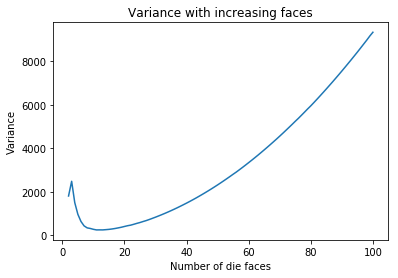

In [12]:
# Plotting how the variance changes with increasing number of faces

plt.plot(res[:,0], res[:,1])
plt.title("Variance with increasing faces")
plt.xlabel("Number of die faces")
plt.ylabel("Variance")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

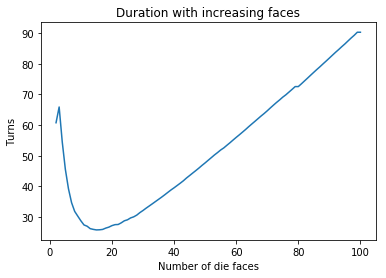

In [13]:
# Plotting how the  expected duration changes with increasing number of faces

plt.plot(res[:,0], res[:,2])
plt.title("Duration with increasing faces")
plt.xlabel("Number of die faces")
plt.ylabel("Turns")
plt.show